In [2]:
# 📥 Step 1: Load the dataset
import pandas as pd
file_path = r'C:\Users\Admin\Documents\GitHub\brazilian-ecommerce-capstone\data\raw\olist_order_reviews_dataset.csv'
df_reviews = pd.read_csv(file_path)
df_reviews.info()
df_reviews.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [3]:
# 🔎 Step 2: Check for nulls
df_reviews.isnull().sum()


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [4]:
# 🧹 Step 3: Drop rows with missing review comments
df_reviews_clean = df_reviews.dropna(subset=['review_comment_message'])


In [5]:
# 📆 Step 4: Convert date columns to datetime
date_cols = ['review_creation_date', 'review_answer_timestamp']
for col in date_cols:
    df_reviews_clean[col] = pd.to_datetime(df_reviews_clean[col], errors='coerce')


C:\Users\Admin\AppData\Local\Temp\ipykernel_17096\1310077129.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_clean[col] = pd.to_datetime(df_reviews_clean[col], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_17096\1310077129.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_clean[col] = pd.to_datetime(df_reviews_clean[col], errors='coerce')


<Axes: title={'center': 'Review Score Distribution'}, xlabel='review_score'>

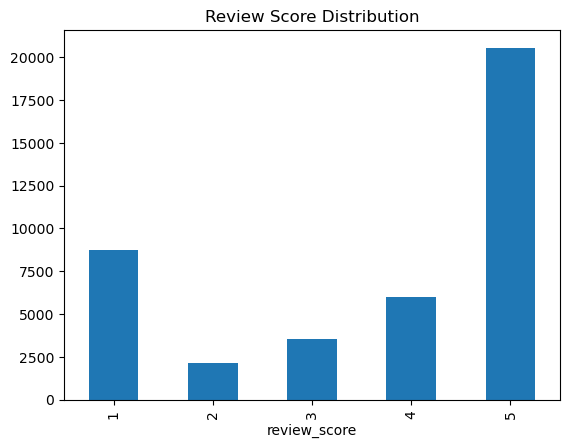

In [6]:
# 📊 Step 5: Ratings Distribution
df_reviews_clean['review_score'].value_counts().sort_index().plot(kind='bar', title='Review Score Distribution')


In [7]:
# ⏱️ Step 6: Calculate review response time (in hours)
df_reviews_clean['review_response_time_hours'] = (
    (df_reviews_clean['review_answer_timestamp'] - df_reviews_clean['review_creation_date'])
    .dt.total_seconds() / 3600
)


C:\Users\Admin\AppData\Local\Temp\ipykernel_17096\812302187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_clean['review_response_time_hours'] = (


<Axes: title={'center': 'Review Response Time (Hours)'}, ylabel='Frequency'>

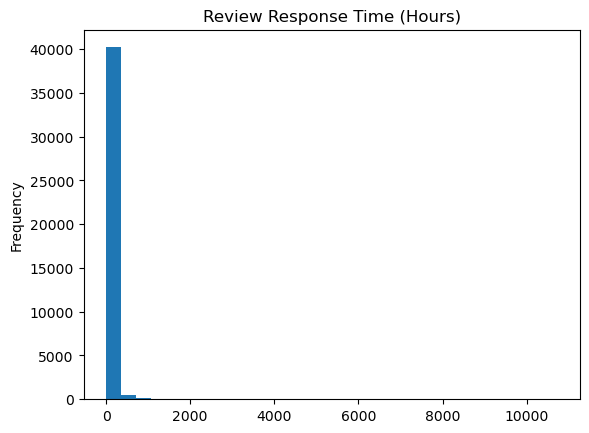

In [8]:
# 📈 Step 7: Histogram of response times
df_reviews_clean['review_response_time_hours'].dropna().plot(kind='hist', bins=30, title='Review Response Time (Hours)')
